In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm # importing colormap
plt.style.use('fivethirtyeight')

In [3]:
prob_of_decay=0.5
def decay_or_not():
    if(random.uniform(0,1)<prob_of_decay):# if it is <0.5 then it should decay, generating a uniform random no btw 0 and 1
        return 1 # as if the coin result is head and the nuclei decays
    else:# if >0.5 then doesn't decay this time
        return 0

In [4]:
def func_val_at_time_t(N_0,t,alpha):
    return N_0*np.exp(-alpha*t)

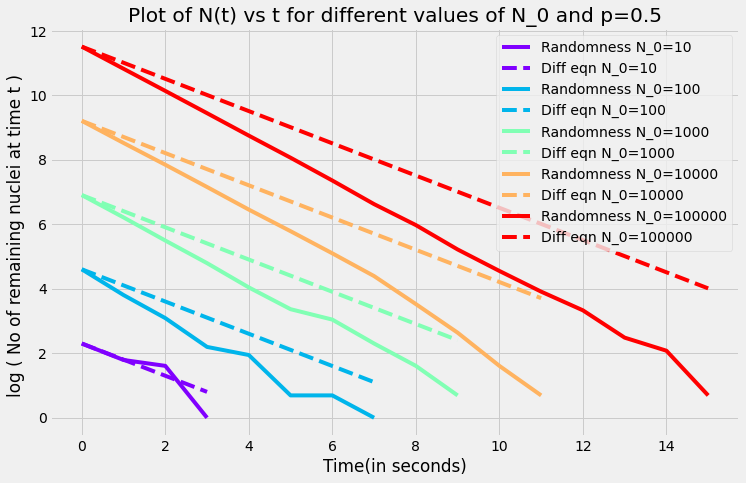

In [5]:
 #inital no of nucei taken
str="Plot of N(t) vs t for different values of N_0 and p={}"
str=str.format(prob_of_decay) # str=str.format()
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time(in seconds)')
plt.ylabel('log ( No of remaining nuclei at time t ) ')
#plt.ylabel(' No of remaining nuclei at time t  ')
    
N_0_vals=[10,100,1000,10000,100000]
#N_0_vals=[2]

color = iter(cm.rainbow(np.linspace(0, 1, len(N_0_vals))))

for n in N_0_vals:
    no_of_nuclei_decayed=0
    cur_time=0

    no_of_remaining_nuclei_at_t=[]
    time_vals=[]

    state_of_nuclei=np.zeros(n) # initially all the nuclei are there, none of them is decayed so state of each of them is 0

    while(cur_time<=150 and no_of_nuclei_decayed<n):
        time_vals.append(cur_time)
        no_of_remaining_nuclei_at_t.append(n-no_of_nuclei_decayed)

        for i in range(n):
            if(state_of_nuclei[i]==0 and decay_or_not()):
                no_of_nuclei_decayed+=1
                state_of_nuclei[i]=1
        cur_time+=1
        
    no_of_remaining_nuclei_at_t_using_diff_eqn=np.zeros(len(time_vals))
    alpha=prob_of_decay
    for i in range(len(time_vals)):
        no_of_remaining_nuclei_at_t_using_diff_eqn[i]=func_val_at_time_t(n,i,alpha)

    str2='Randomness N_0={}'
    str2=str2.format(n)
    str3='Diff eqn N_0={}'
    str3=str3.format(n)
    
    col=next(color)
    
    plt.plot(time_vals,np.log(no_of_remaining_nuclei_at_t),label=str2,c=col)
    plt.plot(time_vals,np.log(no_of_remaining_nuclei_at_t_using_diff_eqn),linestyle='--',c=col,label=str3)
plt.legend()
    


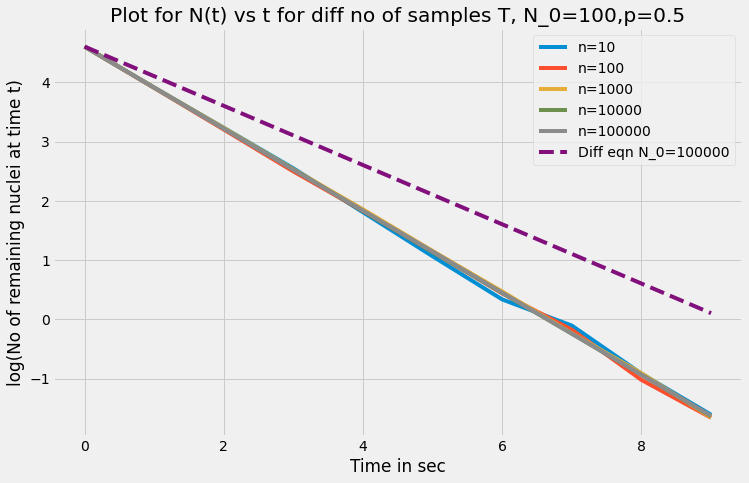

In [6]:
 #inital no of nucei taken
N_0_vals=[100]
    
str="Plot for N(t) vs t for diff no of samples T, N_0={},p={}"
str=str.format(N_0_vals[0],prob_of_decay) # str=str.format()
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time in sec')
#plt.ylabel('log ( No of remaining nuclei at time t ) ')
plt.ylabel('log(No of remaining nuclei at time t)')

upper_time=10
    
for n in N_0_vals:
        
    time_vals=np.arange(0,upper_time)
    
    sample_size=[10,100,1000,10000,100000]
   # sample_size=[10]
    sample_avg_no_of_remaining_nuclei=np.zeros((len(sample_size),upper_time))
    sample_std_dev_of_no_of_remaining_nuclei=np.zeros((len(sample_size),upper_time))
    ind=0
    for s_size in sample_size:
        no_of_remaining_nuclei_sample_series=n*np.ones((s_size,upper_time))
        
        for x in range(s_size):
            no_of_nuclei_decayed=0
            cur_time=0
            no_of_remaining_nuclei_at_t=np.zeros(upper_time)
            state_of_nuclei=np.zeros(n) # initially all the nuclei are there, none of them is decayed so state of each of them is 0
            
            while(cur_time<upper_time and no_of_nuclei_decayed<n):
                #time_vals.append(cur_time)
                no_of_remaining_nuclei_at_t[cur_time]=(n-no_of_nuclei_decayed)

                for i in range(n):
                    if(state_of_nuclei[i]==0 and decay_or_not()):
                        no_of_nuclei_decayed+=1
                        state_of_nuclei[i]=1
                cur_time+=1
                
            no_of_remaining_nuclei_sample_series[x,:]=no_of_remaining_nuclei_at_t
        sample_avg_no_of_remaining_nuclei[ind]=(np.sum(no_of_remaining_nuclei_sample_series,axis=0))/s_size
        sample_std_dev_of_no_of_remaining_nuclei[ind]=np.std(no_of_remaining_nuclei_sample_series,axis=0)
        ind+=1    
#print(sample_avg_no_of_remaining_nuclei)
    
no_of_remaining_nuclei_at_t_using_diff_eqn=np.zeros(len(time_vals))
alpha=prob_of_decay
for i in range(len(time_vals)):
    no_of_remaining_nuclei_at_t_using_diff_eqn[i]=func_val_at_time_t(N_0_vals[0],i,alpha)

color = iter(cm.rainbow(np.linspace(0, len(sample_size))))
#col=['r','b','y']
for i in range(len(sample_size)):
    #col=next(color)
    str2='n={}'
    str2=str2.format(sample_size[i])
    plt.plot(time_vals,np.log(sample_avg_no_of_remaining_nuclei[i]),label=str2)
    
plt.plot(time_vals,np.log(no_of_remaining_nuclei_at_t_using_diff_eqn),linestyle='--',label=str3)
plt.legend()
    


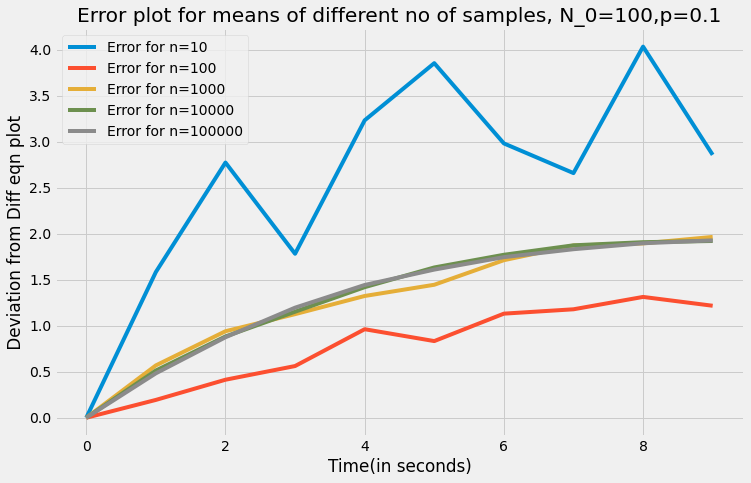

In [117]:
str="Error plot for means of different no of samples, N_0={},p={}"
str=str.format(N_0_vals[0],prob_of_decay) # str=str.format()
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time(in seconds)')
plt.ylabel(' Deviation from Diff eqn plot ')

for i in range(len(sample_size)):
    #col=next(color)
    str2='Error for n={}'
    str2=str2.format(sample_size[i])
    plt.plot(time_vals,abs(no_of_remaining_nuclei_at_t_using_diff_eqn-sample_avg_no_of_remaining_nuclei[i]),label=str2)
plt.legend()

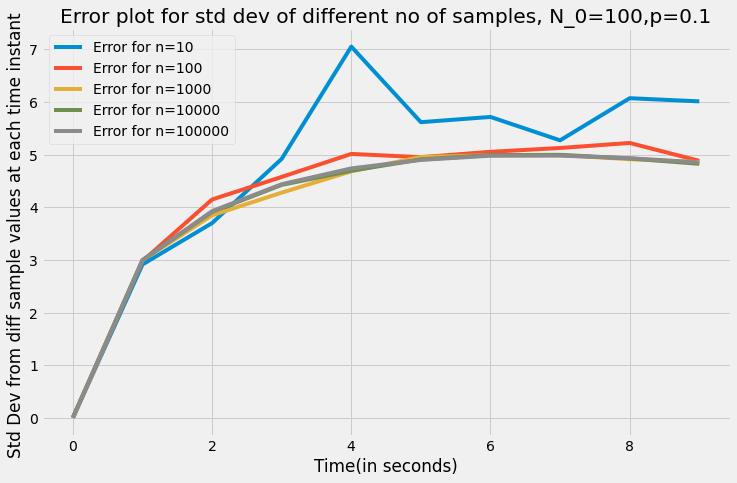

In [118]:
str="Error plot for std dev of different no of samples, N_0={},p={}"
str=str.format(N_0_vals[0],prob_of_decay) # str=str.format()
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time(in seconds)')
plt.ylabel('Std Dev from diff sample values at each time instant ')

for i in range(len(sample_size)):
    #col=next(color)
    str2='Error for n={}'
    str2=str2.format(sample_size[i])
    plt.plot(time_vals,sample_std_dev_of_no_of_remaining_nuclei[i],label=str2)
plt.legend()

In [119]:
print(sample_avg_no_of_remaining_nuclei)

[[100.       88.9      79.1      72.3      63.8      56.8      51.9
   47.       40.9      37.8    ]
 [100.       90.29     81.46     73.52     66.07     59.82     53.75
   48.48     43.62     39.44   ]
 [100.       89.915    80.933    72.956    65.709    59.208    53.169
   47.787    43.038    38.692  ]
 [100.       89.9704   80.99     72.9297   65.6131   59.02     53.1103
   47.7848   43.0252   38.7362 ]
 [100.       90.00091  80.99858  72.88568  65.58939  59.04315  53.13603
   47.82711  43.03689  38.72952]]


In [121]:
print(no_of_remaining_nuclei_at_t_using_diff_eqn)

[100.          90.4837418   81.87307531  74.08182207  67.0320046
  60.65306597  54.88116361  49.65853038  44.93289641  40.65696597]


In [122]:
np.mean(sample_std_dev_of_no_of_remaining_nuclei,axis=1)

array([4.72831518, 4.19576383, 4.05174173, 4.06823722, 4.07509709])

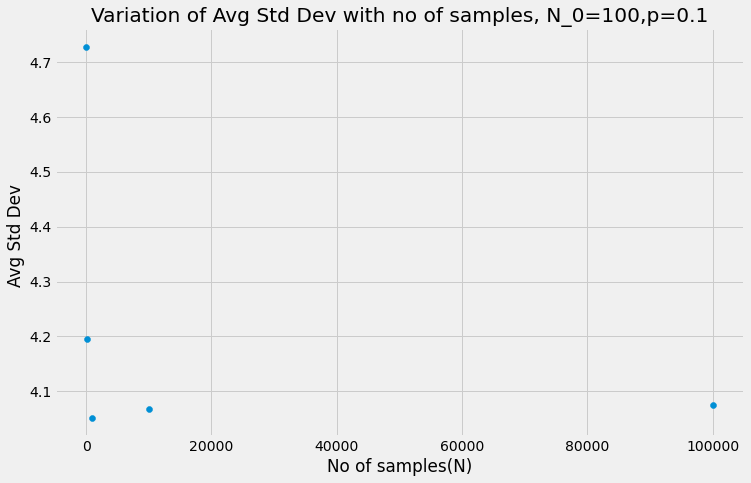

In [123]:
str="Variation of Avg Std Dev with no of samples, N_0={},p={}"
str=str.format(N_0_vals[0],prob_of_decay) # str=str.format()
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('No of samples(N)')
plt.ylabel('Avg Std Dev ')
plt.scatter(sample_size,np.mean(sample_std_dev_of_no_of_remaining_nuclei,axis=1))
#plt.legend()

## No of decays in a time interval T

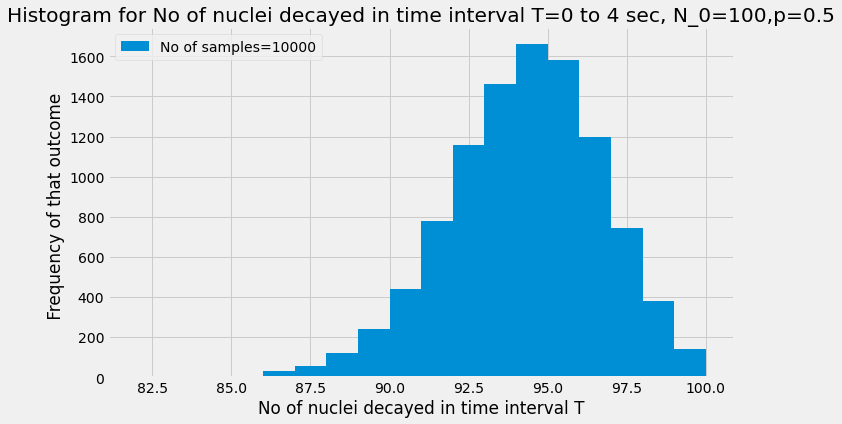

In [170]:
 #inital no of nucei taken
N_0_vals=[100]
no_of_samples=10000
upper_time=4

str="Histogram for No of nuclei decayed in time interval T=0 to {} sec, N_0={},p={}"
str=str.format(upper_time,N_0_vals[0],prob_of_decay) # str=str.format()
plt.figure(figsize=(10,6))
plt.title(str)
plt.xlabel('No of nuclei decayed in time interval T')
#plt.ylabel('log ( No of remaining nuclei at time t ) ')
plt.ylabel(' Frequency of that outcome  ')    
sample_vals_for_no_of_nuclei_decayed=np.zeros(no_of_samples)


for n in N_0_vals:
    for x in range(no_of_samples):
        no_of_nuclei_decayed=0
        cur_time=0
        no_of_remaining_nuclei_at_t=np.zeros(upper_time)
        state_of_nuclei=np.zeros(n) # initially all the nuclei are there, none of them is decayed so state of each of them is 0
        while(cur_time<upper_time and no_of_nuclei_decayed<n):
            no_of_remaining_nuclei_at_t[cur_time]=(n-no_of_nuclei_decayed)
            for i in range(n):
                if(state_of_nuclei[i]==0 and decay_or_not()):
                    no_of_nuclei_decayed+=1
                    state_of_nuclei[i]=1
            cur_time+=1
        sample_vals_for_no_of_nuclei_decayed[x]=no_of_nuclei_decayed

min_no=min(sample_vals_for_no_of_nuclei_decayed)
max_no=max(sample_vals_for_no_of_nuclei_decayed)
intervals=np.arange(min_no,max_no+1)
str2="No of samples={}"
str2=str2.format(no_of_samples)
plt.hist(sample_vals_for_no_of_nuclei_decayed,bins=intervals,label=str2)
plt.legend()

## Using deterministic diff eqn model 

In [169]:
sample_vals_for_no_of_nuclei_decayed

array([93., 93., 91., 97., 93., 97., 88., 95., 92., 95., 93., 92., 89.,
       94., 94., 94., 95., 95., 95., 95., 91., 92., 90., 95., 95., 93.,
       91., 95., 95., 93., 92., 94., 98., 92., 94., 94., 96., 92., 96.,
       95., 93., 94., 96., 94., 92., 92., 92., 96., 92., 95., 95., 94.,
       94., 95., 92., 94., 95., 95., 89., 90., 95., 89., 95., 92., 93.,
       96., 94., 95., 94., 94., 98., 93., 97., 95., 90., 96., 89., 86.,
       95., 96., 92., 93., 92., 94., 95., 93., 96., 94., 91., 97., 91.,
       92., 90., 92., 94., 92., 94., 98., 93., 96., 92., 94., 94., 94.,
       95., 98., 97., 96., 93., 95., 92., 88., 95., 93., 96., 88., 93.,
       96., 92., 98., 92., 95., 86., 95., 96., 95., 94., 94., 92., 90.,
       93., 94., 92., 94., 95., 91., 95., 96., 93., 92., 96., 97., 96.,
       91., 94., 93., 91., 93., 90., 96., 91., 94., 96., 96., 97., 92.,
       96., 95., 93., 92., 91., 93., 88., 90., 94., 96., 90., 96., 92.,
       95., 97., 92., 94., 96., 89., 95., 89., 94., 92., 95., 94

(array([ 1.,  1.,  0.,  3.,  3.,  2.,  5., 10.,  9., 10.,  6., 10.,  3.,
         6.,  8.,  9.,  5.,  2.,  1.,  2.,  0.,  1.,  0.,  1.,  0.,  1.,
         1.]),
 array([24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36.,
        37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.,
        50., 51.]),
 <BarContainer object of 27 artists>)

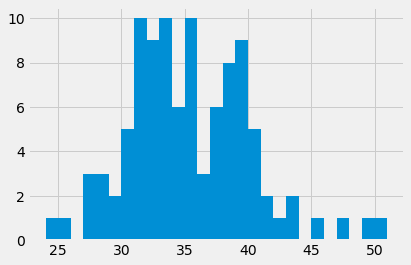

In [133]:
min_no=min(sample_vals_for_no_of_nuclei_decayed)
max_no=max(sample_vals_for_no_of_nuclei_decayed)
intervals=np.arange(min_no,max_no+1)
plt.hist(sample_vals_for_no_of_nuclei_decayed,bins=intervals)
